# **About this file**
* ## *This file has the details of 1000 users from different backgrounds with some injected NA values and output variables as to whether or not they buy a bike.*



# **Importing Packages**

In [1]:
# Import Librarys.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn import metrics

# **Importing Dataset**

In [2]:
# Read The Data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All Data Sets/bike_buyers.csv')
df1 = df.rename(columns={'Purchased Bike': 'Purchasedbike'})
df1['Purchasedbike'] = df1['Purchasedbike'].replace(['Yes'],'1')
df1['Purchasedbike'] = df1['Purchasedbike'].replace(['No'],'0')
df1

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchasedbike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,1
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,1
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,1
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,1
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,0


# **See The Shape Of How Many Columns And Rows.**



In [3]:
df1.shape

(1000, 13)

# **Find The Information To See The Types.**

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchasedbike     1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


# **See The Null Values.**

In [5]:
df1.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchasedbike        0
dtype: int64

## **Insights**

  *  ### *This Dataset Have Some Null Values.*



















# **See The Different Columns.**

In [6]:
df1.columns 

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchasedbike'],
      dtype='object')

# **See The Types Of Data.**

In [7]:
df1.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchasedbike        object
dtype: object

# ***Fill The Null Values.***

In [8]:
df1['Age'].fillna(value=df.Age.mean() , inplace=True)

In [ ]:
df1["Cars"].fillna(value=df.Cars.mean() , inplace=True)

In [ ]:
df1["Children"].fillna(value=df.Children.mean() , inplace=True)

In [ ]:
df1["Income"].fillna(value=df.Income.mean() , inplace=True)

In [ ]:
df1["Home Owner"].fillna( method ='ffill' , inplace = True)

In [ ]:
df1["Gender"].fillna( method ='ffill' , inplace = True)

In [ ]:
df1["Marital Status"].fillna( method ='ffill' , inplace = True)

# **Again See The Null Values.**

In [ ]:
df1.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchasedbike       0
dtype: int64

## **Insights**
* ### *There Is No Null Values.*

# ***Bike Purchase Trend According to Gender***

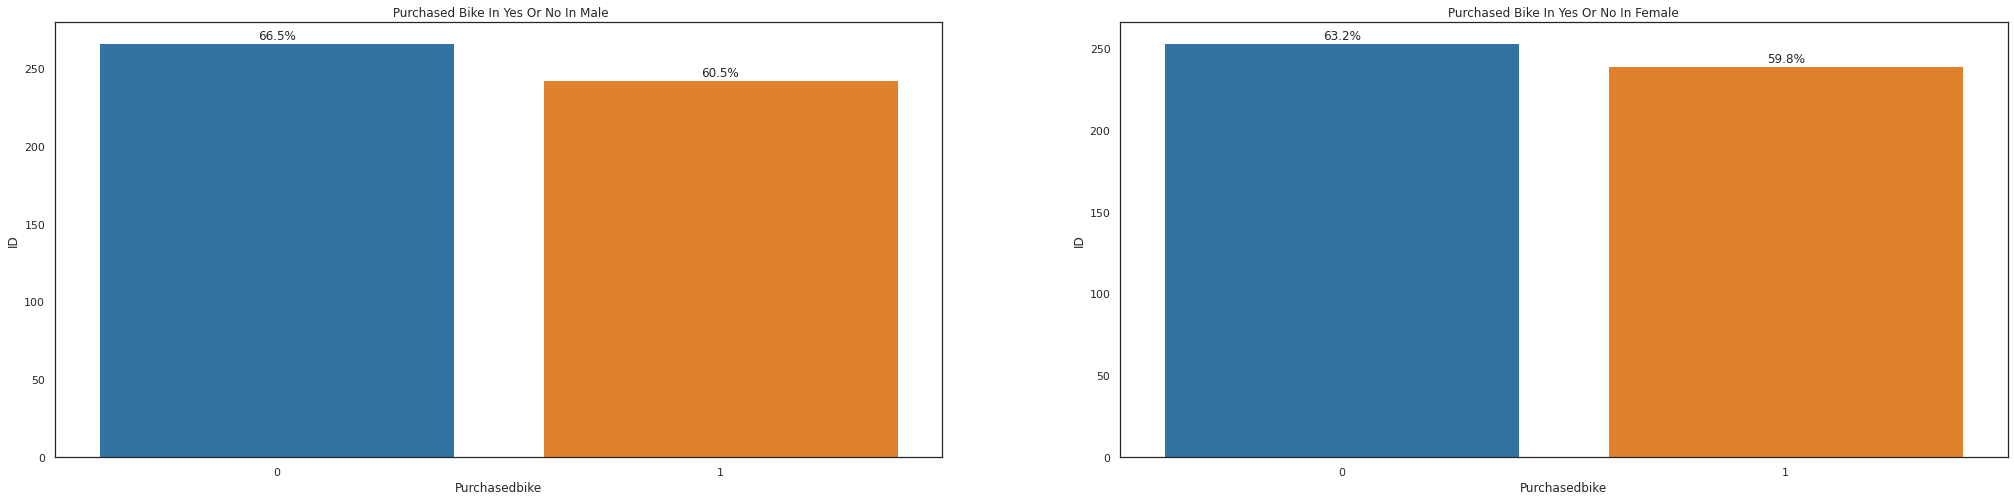

In [ ]:
gender=df1.groupby(["Gender","Purchasedbike"],as_index=False)["ID"].count()
male=gender[gender["Gender"]=="Male"]
female=gender[gender["Gender"]=="Female"]

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(35,8))
ax1.set_title(' Purchased Bike In Yes Or No In Male')
ax=sns.barplot(x="Purchasedbike",y="ID",data=male,ax=ax1)
total = len(male['Purchasedbike'])
for p in ax.patches:
    percentage = f'{0.50 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
ax2.set_title('Purchased Bike In Yes Or No In Female')
ax=sns.barplot(x="Purchasedbike",y="ID",data=female,ax=ax2)
for p in ax.patches:
    percentage = f'{0.50 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

## **Insights**
* ### *Bike purchased trend according to gender.*
* ### *maximum sold is 'male'*
* ### *and minimum sold is 'Female'.*



#***Bike Purchasing Trend According to Region***

In [ ]:
region=df1.groupby(["Region"],as_index=False)["Purchasedbike"].count()
region

,Region,Purchasedbike
0,Europe,300
1,North America,508
2,Pacific,192


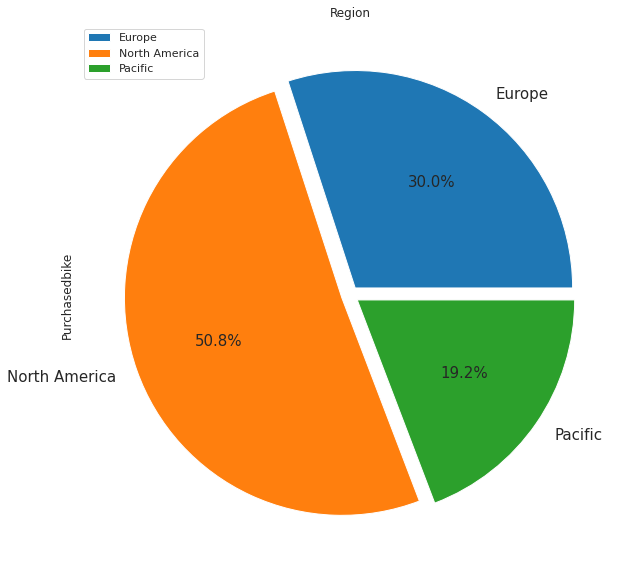

In [ ]:
region.plot.pie(title='Region',y='Purchasedbike',figsize=(10,10),fontsize=(15),autopct='%.1f%%',explode=(0.04,0.04,0.04),labels=region["Region"])
plt.show()


## **Insights**
* ### *Bike purchased trend according to Region.* 
* ### *maximum sold is 'North America'* 
* ### *and minimum sold is 'Pacific'.*


## **Bike Purchasing Trend According Occupation.**

In [ ]:
occupation=df1.groupby(["Occupation"],as_index=False)["Purchasedbike"].count()
occupation

,Occupation,Purchasedbike
0,Clerical,177
1,Management,173
2,Manual,119
3,Professional,276
4,Skilled Manual,255


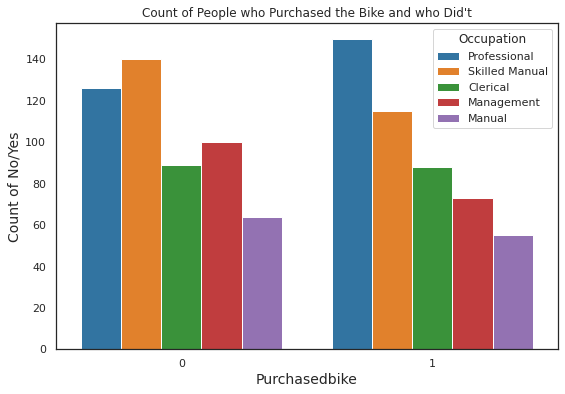

In [ ]:
#Bike purchasing trend accoreding to occupation
fig, ax=plt.subplots(figsize=(9, 6))
ax=sns.countplot(x="Purchasedbike", data=df1, hue='Occupation', hue_order=['Professional', 'Skilled Manual', 'Clerical', 'Management', 'Manual'])

#Setting labels and font size
ax.set(xlabel='Purchasedbike', ylabel='Count of No/Yes',title="Count of People who Purchased the Bike and who Did't")
ax.xaxis.get_label().set_fontsize(14)
ax.yaxis.get_label().set_fontsize(14)

plt.show()

## **Insights**
* ### *Bike purchased trend according to Occupation.*
* ### *maximum sold is 'Professional'* 
* ### *and minimum sold is 'Manual'.*


# **Overall Bike Purchased In 'Yes'.**

In [ ]:
yes=df1[df1['Purchasedbike']=='Yes']
yes  

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchasedbike


## **Insights**
* ### *Total NO Of Bike Purchased Is '481'*

# **Overall Bike Purchased In 'No'.**

In [ ]:
no=df1[df1['Purchasedbike']=='No']
no

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchasedbike


## **Insights**
* ### *Total NO Of Not Purchased The Bike Is '519'*

#***Bike Purchasing Trend According to Age***

In [ ]:
age=df1.groupby(["Age"],as_index=False)["Purchasedbike"].count()
age

,Age,Purchasedbike
0,25.000000,5
1,26.000000,16
2,27.000000,23
3,28.000000,22
4,29.000000,16
5,30.000000,26
6,31.000000,25
7,32.000000,33
8,33.000000,21
9,34.000000,31


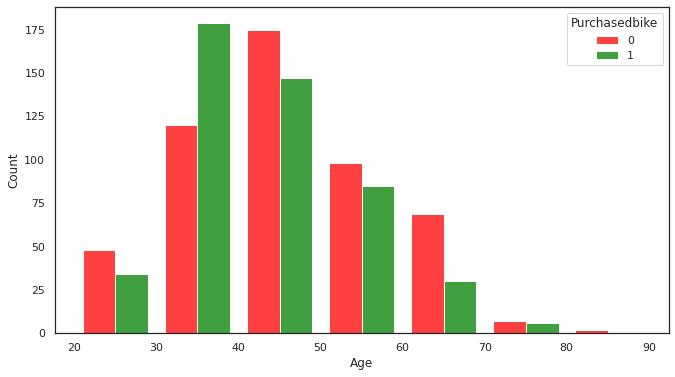

In [ ]:
fig, ax=plt.subplots(figsize=(11, 6))
sns.histplot(x="Age", data=df1, hue="Purchasedbike", multiple="dodge", shrink=0.8, bins=[20, 30, 40, 50, 60, 70, 80, 90], palette=sns.blend_palette(['red', 'green'], 2))
plt.show()

## **Insights**
* ### *Bike purchased trend according to Age* 
* ### *maximum sold is '30 - 40'*
* ### *and minimum sold is '70 - 90'.*


## **Bike Purchasing Trend According to Marital Status**


In [ ]:
marital=df1.groupby(["Marital Status"],as_index=False)["Purchasedbike"].count()
marital

,Marital Status,Purchasedbike
0,Married,539
1,Single,461


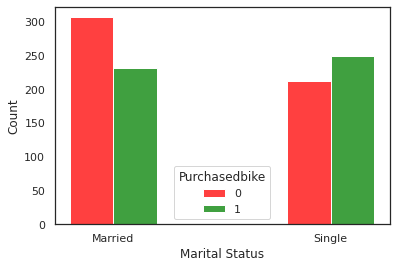

In [ ]:
#Bike Purchasing Trend According to Marital Status
sns.histplot(x="Marital Status", data=df1, hue="Purchasedbike", multiple="dodge", shrink=0.4, palette=sns.blend_palette(['red', 'green'], 2))
plt.show()

## **Insights**
* ### *Bike purchased trend according to Marital Status* 
* ### *maximum sold is 'single'* 
* ### *and minimum sold is 'Married'.*


# ***Bike Purchasing Trend According to Salary***

In [ ]:
income=df1.groupby(["Income"],as_index=False)["Purchasedbike"].count()
income

,Income,Purchasedbike
0,10000.000000,73
1,20000.000000,74
2,30000.000000,134
3,40000.000000,153
4,50000.000000,40
5,56267.605634,6
6,60000.000000,165
7,70000.000000,123
8,80000.000000,90
9,90000.000000,38


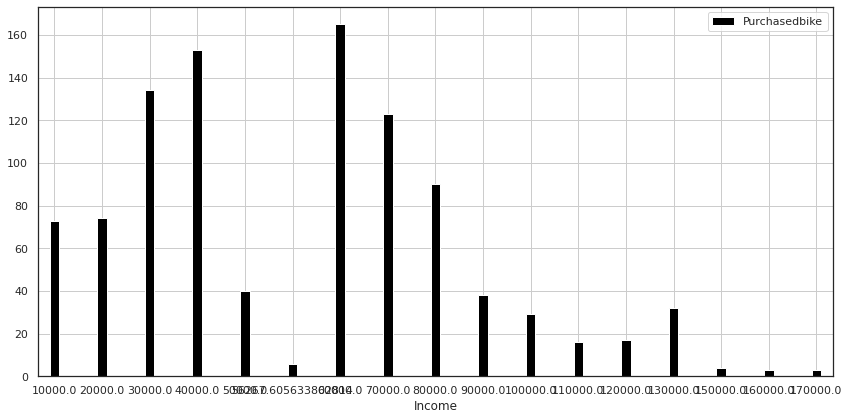

In [ ]:
Income = df1.groupby(['Income'], as_index = False)['Purchasedbike'].count()
Income.plot(kind = 'bar' , x = 'Income' , y = 'Purchasedbike', figsize = (12 , 6) , color = 'black' , grid = True , width = 0.2 , rot = 0)
plt.tight_layout()
plt.show()

## **Insights**
* ### *Bike purchased trend according to  Income* 
* ### *maximum sold is '30k - 60k'* 
* ### *and minimum sold is 'Above 90k'.*


# **Bike Purchasing Trend According to Education**

In [ ]:
education=df1.groupby(["Education"],as_index=False)["Purchasedbike"].count()
education

,Education,Purchasedbike
0,Bachelors,306
1,Graduate Degree,174
2,High School,179
3,Partial College,265
4,Partial High School,76


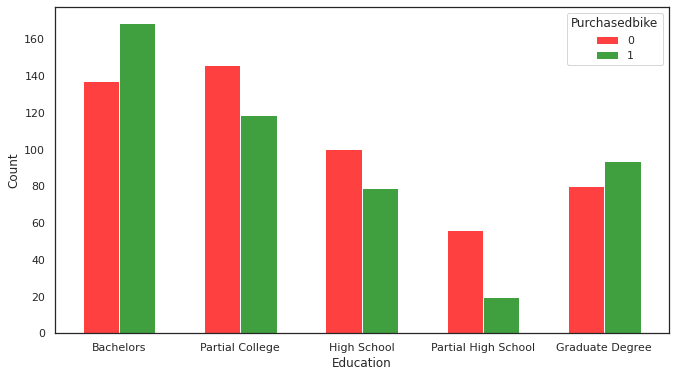

In [ ]:
#Bike Purchasing Trend According to Education
fig, ax=plt.subplots(figsize=(11, 6))
sns.set_theme(style='white', palette=None)
sns.histplot(x="Education", data=df1, hue="Purchasedbike", multiple="dodge", shrink=0.6, palette=sns.blend_palette(['red', 'green'], 2))
plt.show()

## **Insights**
* ### *Bike purchased trend according to  Education* 
* ### *maximum sold is 'Bachelors'* 
* ### *and minimum sold is 'Partial High School'.*



#***Bike Purchasing Trend According to Numbers of their Children***

In [ ]:
children=df1.groupby(["Children"],as_index=False)["Purchasedbike"].count()
children

,Children,Purchasedbike
0,0.000000,274
1,1.000000,169
2,1.910282,8
3,2.000000,209
4,3.000000,133
5,4.000000,126
6,5.000000,81


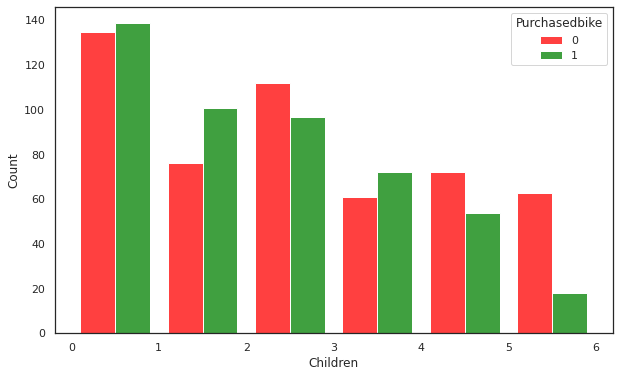

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x="Children", data=df1, hue="Purchasedbike", multiple="dodge", shrink=0.8, bins=[0, 1, 2, 3, 4, 5, 6], palette=sns.blend_palette(['red', 'green'], 2))
plt.show()

## **Insights**
* ### *Bike purchased trend according to Children* 
* ### *maximum sold is '1 - 3'* 
* ### *and minimum sold is 'Above 4'.*


## **Bike Purchasing Trend According to Number of Cars They Own**


In [ ]:
car=df1.groupby(["Cars"],as_index=False)["Purchasedbike"].count()
car

,Cars,Purchasedbike
0,0.000000,238
1,1.000000,267
2,1.455096,9
3,2.000000,342
4,3.000000,85
5,4.000000,59


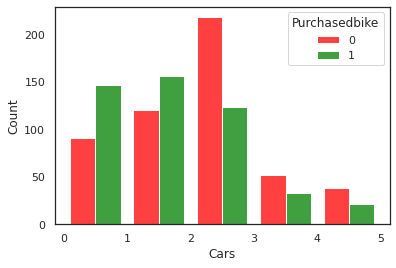

In [ ]:
#Bike Purchasing Trend According to Number of Cars They Own
sns.histplot(x="Cars", data=df1, hue="Purchasedbike", multiple="dodge", shrink=0.8, bins=[0, 1, 2, 3, 4, 5], palette=sns.blend_palette(['red', 'green'], 2))
plt.show()

## **Insights**
* ### *Data Is Being Plotted On Cars Depending on Purchased Bike.*
* ### *Maximum Sold Is 0 -2.*
* ### *Minimum Sold Is 3 -5.*

## **Bike Purchasing Trend of Home Owners**


In [ ]:
home=df1.groupby(["Home Owner"],as_index=False)["Purchasedbike"].count()
home

,Home Owner,Purchasedbike
0,No,314
1,Yes,686


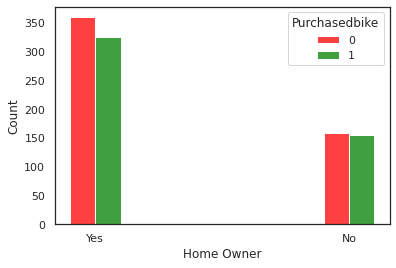

In [ ]:
#Bike Purchasing Trend of Home Owners
sns.histplot(x="Home Owner", data=df1, hue="Purchasedbike", multiple="dodge", shrink=0.2, palette=sns.blend_palette(['red', 'green'], 2))
plt.show()

## **Insights**
* ### *Bike purchased trend according to  Home Owner* 
* ### *maximum sold is 'Yes'* 
* ### *and minimum sold is 'No'.*


#***Bike Purchasing Trend According to Commuting Distance***

In [ ]:
distance=df1.groupby(["Commute Distance"],as_index=False)["Purchasedbike"].count()
distance

,Commute Distance,Purchasedbike
0,0-1 Miles,366
1,1-2 Miles,169
2,10+ Miles,111
3,2-5 Miles,162
4,5-10 Miles,192


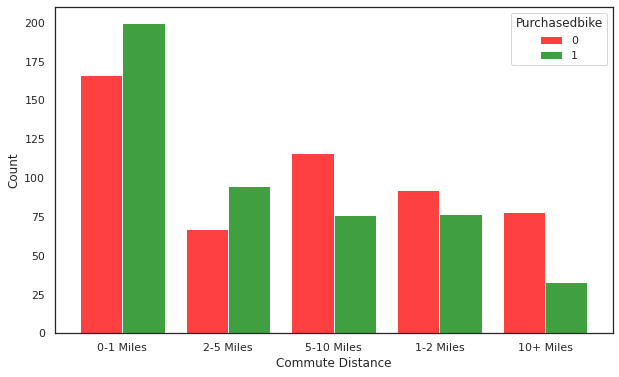

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x="Commute Distance", data=df1, hue="Purchasedbike", multiple="dodge", shrink=0.8, bins=[0, 1, 2, 3, 4, 5, 6], palette=sns.blend_palette(['red', 'green'], 2))
plt.show()

## **Insights**
* ### *Bike purchased trend according to Commute Distance* 
* ### *maximum sold is '0-1 Miles'* 
* ### *and minimum sold is 'Above 5 Miles'.*
